## Installs and Imports

In [10]:
!pip install Jinja2

In [2]:
#Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [3]:
# import data
csv_files= ["gt_2011.csv", "gt_2012.csv", "gt_2013.csv", "gt_2014.csv", "gt_2015.csv"]
pp_data_files=[]
for filename in csv_files:
    pp_data = pd.read_csv(filename)
    pp_data_files.append(pp_data)


In [4]:
# check shape of dataframes
for num, df in enumerate(pp_data_files):
    print("year: ",2011+num,"| dimensions: ",df.shape)

year:  2011 | dimensions:  (7411, 11)
year:  2012 | dimensions:  (7628, 11)
year:  2013 | dimensions:  (7152, 11)
year:  2014 | dimensions:  (7158, 11)
year:  2015 | dimensions:  (7384, 11)


In [5]:
# concatenate all the data into one dataframe to perform statistical operations
all_data= pd.concat(pp_data_files, axis=0)
all_data.shape

(36733, 11)

## Data Exploration
#### Statistics and visualizations for univariate and multivariate analysis

In [6]:
# columns in the data set
all_data.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
5,3.8858,1017.7,83.946,3.5824,23.903,1086.0,549.98,134.67,11.868,0.23473,81.748
6,3.6697,1018.0,84.114,3.5804,23.889,1085.9,550.04,134.68,11.877,0.44412,84.592
7,3.5892,1018.2,83.867,3.5777,23.876,1086.0,549.88,134.66,11.893,0.79996,84.193
8,3.7108,1018.5,84.948,3.6027,23.957,1086.3,549.98,134.65,11.870,0.68996,83.978
9,4.8281,1018.5,85.346,3.5158,23.422,1083.1,549.80,132.67,11.694,1.02810,82.654


In [7]:
# Do statistical summaries on the whole data(all_data) and on the data for each year separately
# to get trends and understand the data distribution
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,36733.0,17.712726,7.447451,-6.234800,11.7810,17.8010,23.6650,37.1030
AP,36733.0,1013.070165,6.463346,985.850000,1008.8000,1012.6000,1017.0000,1036.6000
AH,36733.0,77.867015,14.461355,24.085000,68.1880,80.4700,89.3760,100.2000
AFDP,36733.0,3.925518,0.773936,2.087400,3.3556,3.9377,4.3769,7.6106
GTEP,36733.0,25.563801,4.195957,17.698000,23.1290,25.1040,29.0610,40.7160
TIT,36733.0,1081.428084,17.536373,1000.800000,1071.8000,1085.9000,1097.0000,1100.9000
TAT,36733.0,546.158517,6.842360,511.040000,544.7200,549.8800,550.0400,550.6100
TEY,36733.0,133.506404,15.618634,100.020000,124.4500,133.7300,144.0800,179.5000
CDP,36733.0,12.060525,1.088795,9.851800,11.4350,11.9650,12.8550,15.1590
CO,36733.0,2.372468,2.262672,0.000388,1.1824,1.7135,2.8429,44.1030


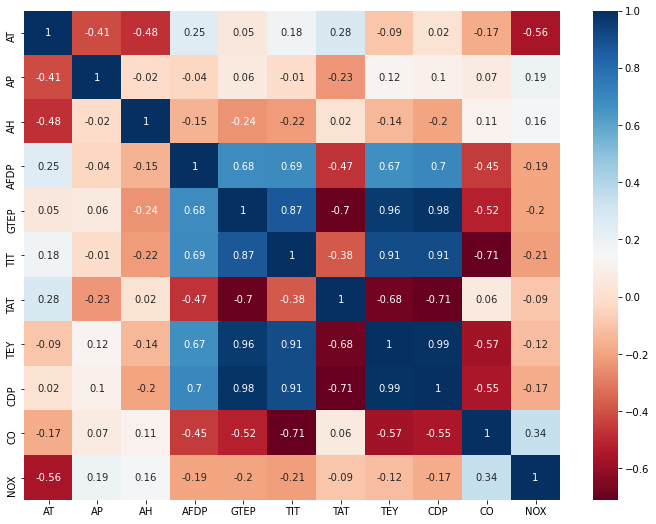

In [8]:
# Correlation calculations on the data set (all_data)
corr= all_data.corr().round(2)
fig= plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

Figure 3 reveals the existence of a very strong linear dependency among the input variables, particularly
between compressor discharge pressure (CDP) and turbine energy yield (TEY) (0.99), similarly CDP and gas
turbine exhaust pressure (GTEP) (0.98). GTEP has also very strong correlation with TEY (0.96). This shows
that some of the features may contain redundant information, and thus can be eliminated during model learning.
Moreover, we see that the five turbine parameters (namely GTEP, CDP, AFDP, TIT, and TAT) have stronger
correlations with TEY, compared to the three ambient variables (AT, AP, and AH) used as features in [24, 25].

## Split Train, Validation and Test sets
#### This was done as explained in the reference paper

In [9]:
#train set:2011-2012, validation set: 2013, test set: 2014-2015
train_set= pd.concat([pp_data_files[0],pp_data_files[1]], axis=0)
val_set= pp_data_files[2]
test_set= pd.concat([pp_data_files[3],pp_data_files[4]], axis=0)

print(train_set.shape, val_set.shape , test_set.shape)

(15039, 11) (7152, 11) (14542, 11)


In [10]:
# separate x, yNOx and yCO for the training, validation and test
# features and target values are converted to arrays for easier computation in the Ml model
X_train= train_set[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
yNOx_train= train_set['NOX']
yCO_train= train_set['CO']

X_val= val_set[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
yNOx_val= val_set['NOX']
yCO_val= val_set['CO']

X_test= test_set[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
yNOx_test= test_set['NOX']
yCO_test= test_set['CO']

## Data Preprocessing
#### Normalization and Feature Selection

In [11]:
# Normalization
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)

X_val_scaled= scaler.transform(X_val)
X_test_scaled= scaler.transform(X_test)
#The features are z-normalized using mean and SD statistics estimated from the corresponding training set

In [12]:
# Feature selection with pearson
features = np.array(X_train.columns)
print("The features in original data are:",features )
# define feature selection for CO
fsCO_scaled = SelectKBest(score_func=f_regression, k=6)
# apply feature selection
X_selected_CO_scaled = fsCO_scaled.fit_transform(X_train_scaled, yCO_train)
filter_CO_scaled = fsCO_scaled.get_support()
print("The selected features for CO are:",features[filter_CO_scaled],"\n with dimensions: ", X_selected_CO_scaled.shape)

# define feature selection for NOx
fsNOx_scaled = SelectKBest(score_func=f_regression, k=6)
# apply feature selection
X_selected_NOx_scaled = fsNOx_scaled.fit_transform(X_train_scaled, yNOx_train)
filter_NOx_scaled = fsNOx_scaled.get_support()
print("The selected features for NOx are:", features[filter_NOx_scaled],"\n with dimensions: ", X_selected_NOx_scaled.shape)

The features in original data are: ['AT' 'AP' 'AH' 'AFDP' 'GTEP' 'TIT' 'TAT' 'TEY' 'CDP']
The selected features for CO are: ['AH' 'AFDP' 'GTEP' 'TIT' 'TEY' 'CDP'] 
 with dimensions:  (15039, 6)
The selected features for NOx are: ['AT' 'AP' 'AH' 'GTEP' 'TIT' 'CDP'] 
 with dimensions:  (15039, 6)


In [13]:
# Feature selection with RFE-Lasso CO
rfe_lr_selector_CO = RFE(estimator=Lasso(), n_features_to_select=6, step=10, verbose=5)
rfe_lr_selector_CO.fit(X_train_scaled, yCO_train)
rfe_lr_support_CO = rfe_lr_selector_CO.get_support()
rfe_lr_feature_CO = X_train.loc[:,rfe_lr_support_CO].columns.tolist()
print(str(len(rfe_lr_feature_CO)), 'selected features for CO')
print(rfe_lr_feature_CO)

# Feature selection with RFE-Lasso NOx
rfe_lr_selector_NOx = RFE(estimator=Lasso(), n_features_to_select=6, step=10, verbose=5)
rfe_lr_selector_NOx.fit(X_train_scaled, yNOx_train)
rfe_lr_support_NOx = rfe_lr_selector_NOx.get_support()
rfe_lr_feature_NOx = X_train.loc[:,rfe_lr_support_NOx].columns.tolist()
print(str(len(rfe_lr_feature_NOx)), 'selected features for NOx')
print(rfe_lr_feature_NOx)

Fitting estimator with 9 features.
6 selected features for CO
['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']
Fitting estimator with 9 features.
6 selected features for NOx
['AT', 'AH', 'GTEP', 'TAT', 'TEY', 'CDP']


In [14]:
# Feature selection with RFE-RandomForest CO
rfe_rf_selector_CO = RFE(estimator=RandomForestRegressor(n_estimators=50, random_state=42), n_features_to_select=6, step=10, verbose=5)
rfe_rf_selector_CO.fit(X_train_scaled, yCO_train)
rfe_rf_support_CO = rfe_rf_selector_CO.get_support()
rfe_rf_feature_CO = X_train.loc[:,rfe_rf_support_CO].columns.tolist()
print(str(len(rfe_rf_feature_CO)), 'selected features for CO')
print(rfe_rf_feature_CO)

# Feature selection with RFE-RandomForest NOx
rfe_rf_selector_NOx = RFE(estimator=RandomForestRegressor(n_estimators=50, random_state=42), n_features_to_select=6, step=10, verbose=5)
rfe_rf_selector_NOx.fit(X_train_scaled, yNOx_train)
rfe_rf_support_NOx = rfe_rf_selector_NOx.get_support()
rfe_rf_feature_NOx = X_train.loc[:,rfe_rf_support_NOx].columns.tolist()
print(str(len(rfe_rf_feature_NOx)), 'selected features for NOx')
print(rfe_rf_feature_NOx)

Fitting estimator with 9 features.
6 selected features for CO
['AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY']
Fitting estimator with 9 features.
6 selected features for NOx
['AT', 'AH', 'AFDP', 'GTEP', 'TIT', 'CDP']


In [17]:
# Feature selection with RFE-SVR CO
rfe_svr_selector_CO = RFE(estimator=SVR(kernel="linear"), n_features_to_select=6, step=1)
rfe_svr_selector_CO.fit(X_train_scaled, yCO_train)
rfe_svr_support_CO = rfe_svr_selector_CO.get_support()
rfe_svr_feature_CO = X_train.loc[:,rfe_svr_support_CO].columns.tolist()
print(str(len(rfe_svr_feature_CO)), 'selected features for CO')
print(rfe_svr_feature_CO)

# Feature selection with RFE-SVR NOx
rfe_svr_selector_NOx = RFE(estimator=SVR(kernel="linear"), n_features_to_select=6, step=1)
rfe_svr_selector_NOx.fit(X_train_scaled, yNOx_train)
rfe_svr_support_NOx = rfe_svr_selector_NOx.get_support()
rfe_svr_feature_NOx = X_train.loc[:,rfe_svr_support_NOx].columns.tolist()
print(str(len(rfe_svr_feature_NOx)), 'selected features for NOx')
print(rfe_svr_feature_NOx)

6 selected features for CO
['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']
6 selected features for NOx
['AT', 'AH', 'GTEP', 'TIT', 'TAT', 'TEY']


In [20]:
# put all selection together
feature_selection_df_CO = pd.DataFrame({'Feature':X_train.columns, 'Pearson':filter_CO_scaled, 'RFE_lr':rfe_lr_support_CO, 
                                     'RFE_rf':rfe_rf_support_CO,'RFE_svr':rfe_svr_support_CO})
# count the selected times for each feature
feature_selection_df_CO['Total'] = np.sum(feature_selection_df_CO, axis=1)
# display the top 
feature_selection_df_CO = feature_selection_df_CO.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df_CO.index = range(1, len(feature_selection_df_CO)+1)
print("Feature ranking for CO:")
feature_selection_df_CO.head(9)

Feature ranking for CO:


,Feature,Pearson,RFE_lr,RFE_rf,RFE_svr,Total
1,TIT,True,True,True,True,4
2,TEY,True,True,True,True,4
3,GTEP,True,True,True,True,4
4,AFDP,True,True,True,True,4
5,TAT,False,True,True,True,3
6,CDP,True,True,False,True,3
7,AT,False,False,True,False,1
8,AH,True,False,False,False,1
9,AP,False,False,False,False,0


In [21]:
# put all selection together for NOx
feature_selection_df_NOx = pd.DataFrame({'Feature':X_train.columns, 'Pearson':filter_NOx_scaled, 'RFE_lr':rfe_lr_support_NOx, 
                                     'RFE_rf':rfe_rf_support_NOx,'RFE_svr':rfe_svr_support_NOx})
# count the selected times for each feature
feature_selection_df_NOx['Total'] = np.sum(feature_selection_df_NOx, axis=1)
# display the top 
feature_selection_df_NOx = feature_selection_df_NOx.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df_NOx.index = range(1, len(feature_selection_df_NOx)+1)
print("Feature ranking for NOx")
feature_selection_df_NOx.head(9)

Feature ranking for NOx


,Feature,Pearson,RFE_lr,RFE_rf,RFE_svr,Total
1,GTEP,True,True,True,True,4
2,AT,True,True,True,True,4
3,AH,True,True,True,True,4
4,TIT,True,False,True,True,3
5,CDP,True,True,True,False,3
6,TEY,False,True,False,True,2
7,TAT,False,True,False,True,2
8,AP,True,False,False,False,1
9,AFDP,False,False,True,False,1


air features more important for NOx and turbine features more important for CO?????????

In [ ]:
# from sklearn.cross_decomposition import CCA

# # rows contain the number of samples for CCA and the number of rvs goes in columns
# X_trainCO = train_set[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']]
# X_trainNOx = train_set[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']]

# # num of components
# n_comps = min(X_trainCO.shape[1], X_trainNOx.shape[1])
# cca = CCA(n_components=n_comps)
# cca.fit(X_trainCO, X_trainNOx)
# X_c, Y_c = cca.transform(X_trainCO, X_trainNOx)

# # calculate and plot the correlations of all components
# corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(n_comps)]    
# plt.plot(corrs)
# plt.xlabel('cca_idx')
# plt.ylabel('cca_corr')
# plt.show()

## Build and Validate models

##### Random Forest

In [64]:
# Random Forest for CO
RF_CO= RandomForestRegressor(n_estimators=50, random_state=42, max_features=4)
RF_CO.fit(X_train_scaled, yCO_train)
print("RF Model accuracy on train set for CO is: ", RF_CO.score(X_train_scaled, yCO_train))
print("RF Model accuracy on validation set for CO is: ", RF_CO.score(X_val_scaled, yCO_val))

# Random Forest for NOx
RF_NOx= RandomForestRegressor(n_estimators=50, random_state=42, max_features=4)
RF_NOx.fit(X_train_scaled, yNOx_train)
print("RF Model accuracy on train set for NOx is: ", RF_NOx.score(X_train_scaled, yNOx_train))
print("RF Model accuracy on validation set for NOx is: ", RF_NOx.score(X_val_scaled, yNOx_val))

RF Model accuracy on train set for CO is:  0.96373551645326
RF Model accuracy on validation set for CO is:  0.703300624183441
RF Model accuracy on train set for NOx is:  0.9848215025234012
RF Model accuracy on validation set for NOx is:  0.6082522514005648


##### Linear Regression Models

In [59]:
#Linear Regression for CO
LinearR_CO= LinearRegression()
LinearR_CO.fit(X_train_scaled, yCO_train)
print("Linear reg Model accuracy on train set for CO is: ", LinearR_CO.score(X_train_scaled, yCO_train))
print("Linear reg Model accuracy on validation set for CO is: ", LinearR_CO.score(X_val_scaled, yCO_val))
print()

#Linear Regression for NOx
LinearR_NOx= LinearRegression()
LinearR_NOx.fit(X_train_scaled, yNOx_train)
print("Linear reg Model accuracy on train set for NOx is: ", LinearR_NOx.score(X_train_scaled, yNOx_train))
print("Linear reg Model accuracy on validation set for NO is: ", LinearR_NOx.score(X_val_scaled, yNOx_val))

Linear reg Model accuracy on train set for CO is:  0.5260641176601066
Linear reg Model accuracy on validation set for CO is:  0.5836569533695839

Linear reg Model accuracy on train set for NOx is:  0.5496785910920499
Linear reg Model accuracy on validation set for NO is:  0.2217619983105068


In [31]:
#Ridge
best_score_CO, best_score_NOx= 0,0
for alpha in [10, 1, 0.1, 0.01, 0.001]:
    # Model for CO
    RR_CO= Ridge(alpha=alpha)
    RR_CO.fit(X_train_scaled, yCO_train)
    score_val_CO= RR_CO.score(X_val_scaled, yCO_val)
    if score_val_CO > best_score_CO:
        best_score_CO= score_val_CO
        score_train_CO= RR_CO.score(X_train_scaled, yCO_train)
        best_param_CO = alpha
    
    # Model for NOx
    RR_NOx= Ridge(alpha=alpha)
    RR_NOx.fit(X_train_scaled, yNOx_train)
    score_val_NOx= RR_NOx.score(X_val_scaled, yNOx_val)
    if score_val_NOx > best_score_NOx:
        best_score_NOx= score_val_NOx
        score_train_NOx= RR_NOx.score(X_train_scaled, yNOx_train)
        best_param_NOx = alpha
    

print("Ridge reg Model accuracy on train set for CO is: ", best_score_CO, score_train_CO, best_param_CO)
print("Ridge reg Model accuracy on train set for NOx is: ", best_score_NOx, score_train_NOx, best_param_NOx)

Ridge reg Model accuracy on train set for NOx is:  0.23970719181671285 0.5465881216743045 10


##### SVM Regression

In [26]:
# Don't run this, still working on it
best_score_CO=0
best_score_NOx= 0
for gamma in []:
    for C in []:
        #SVR for CO
        SupportVR_CO= SVR(C=C, kernel='rbf', gamma=gamma, epsilon=0.1)
        SupportVR_CO.fit(X_train_scaled, yCO_train)
        print("SVR Model accuracy on train set for CO is: ", SupportVR_CO.score(X_train_scaled, yCO_train))

        #SVR for NOx
        SupportVR_NOx= SVR(C=1, kernel='rbf', gamma=0.1, epsilon=0.1)
        SupportVR_NOx.fit(X_train_scaled, yNOx_train)
        print("SVR Model accuracy on train set for NOx is: ", SupportVR_NOx.score(X_train_scaled, yNOx_train))

SVR Model accuracy on train set for CO is:  0.6395441118992802
SVR Model accuracy on train set for NOx is:  0.8333328012339052


##### K-Nearest Neighbors Regression

In [55]:
best_score_CO=0
best_score_NOx= 0
for k in [6,7,8,9,10,11,12,13,14]:
    #KNN for CO
    KNNR_CO= KNeighborsRegressor(n_neighbors=k)
    KNNR_CO.fit(X_train_scaled, yCO_train)
    score_val_CO= KNNR_CO.score(X_val_scaled, yCO_val)
    if score_val_CO > best_score_CO:
        best_score_CO= score_val_CO
        score_train_CO= KNNR_CO.score(X_train_scaled, yCO_train)
        best_param_CO = k

    #KNN for NOx
    KNNR_NOx= KNeighborsRegressor(n_neighbors=k)
    KNNR_NOx.fit(X_train_scaled, yNOx_train)
    score_val_NOx= KNNR_NOx.score(X_val_scaled, yNOx_val)
    if score_val_NOx > best_score_NOx:
        best_score_NOx= score_val_NOx
        score_train_NOx= KNNR_NOx.score(X_train_scaled, yNOx_train)
        best_param_NOx = k
    
    

print("KNN Model accuracy on train set for CO is: ", best_score_CO, score_train_CO, best_param_CO)
print("KNN Model accuracy on train set for NOx is: ", best_score_NOx, score_train_NOx, best_param_NOx)


KNN Model accuracy on train set for CO is:  0.6290401154421293 0.7505227612333956 9
KNN Model accuracy on train set for NOx is:  0.5288512124707643 0.898463461514659 11


## Test Models

Next Steps
- Next optimize the results on the models using training and validation sets
- Write up observations for the presentation
- univariate analysis